In [115]:
import torch
import torch.nn as nn

from torchvision import transforms

import kornia.augmentation as K

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [87]:
!ls /data/scratch/bariskurtkaya/oxford/2014-11-14-16-34-33/stereo/centre/1415985723750113.png

/data/scratch/bariskurtkaya/oxford/2014-11-14-16-34-33/stereo/centre/1415985723750113.png


In [ ]:
glob('/data/scratch/bariskurtkaya/oxford/2014-11-14-16-34-33/stereo/centre/')

In [88]:
img_dir = '/data/scratch/bariskurtkaya/oxford/2014-11-14-16-34-33/stereo/centre/1415985723750113.png'

In [89]:
img = cv.imread(img_dir)

In [90]:
img.shape

(960, 1280, 3)

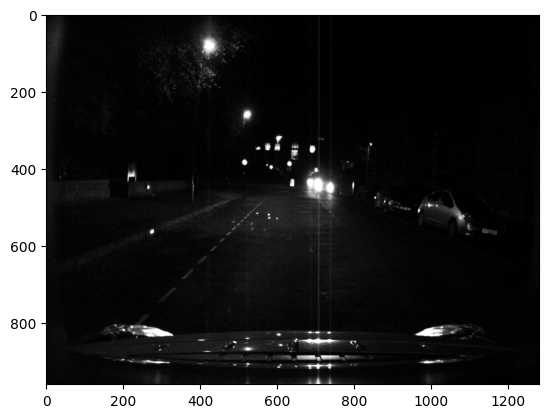

In [91]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [116]:
transform_to_tensor = transforms.ToTensor()

# Convert the image to PyTorch tensor
tensor = transform_to_tensor(img)

In [105]:
transform = nn.Sequential(
    #K.RandomPlanckianJitter("blackbody", same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomPlasmaShadow(roughness=(0.1, 0.7), shade_intensity=(-1.0, 0.0), shade_quantity=(0.0, 1.0), same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomPlasmaBrightness(roughness=(0.1, 0.7), intensity=(0.0, 1.0), same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomPlasmaContrast(roughness=(0.1, 0.7), same_on_batch=False, keepdim=False, p=1.0),
    K.ColorJiggle(0.3, 0.3, 0.3, 0.3, same_on_batch=False, keepdim=False, p=1.0),
    K.ColorJitter(0.3, 0.3, 0.3, 0.3, same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomBoxBlur((21, 5), "reflect", same_on_batch=False, keepdim=False, p=1.0),
    K.RandomBrightness(brightness=(0.8, 1.2), clip_output=True, same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomChannelShuffle(same_on_batch=False, keepdim=False, p=1.0),
    K.RandomContrast(contrast=(0.8, 1.2), clip_output=True, same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomEqualize(same_on_batch=False, keepdim=False, p=1.0),
    K.RandomGamma((0.2, 1.3), (1.0, 1.5), same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomGrayscale(same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomGaussianBlur((21, 21), (0.2, 1.3), "reflect", same_on_batch=False, keepdim=False, p=1.0),
    K.RandomSharpness((0.5, 1.0), same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomGaussianNoise(mean=0.01, std=0.05, same_on_batch=False, keepdim=False, p=1.0),
    K.RandomHue((-0.2, 0.4), same_on_batch=False, keepdim=False, p=1.0),
    #K.RandomMotionBlur((7, 7), 35.0, 0.5, "reflect", "nearest", same_on_batch=False, keepdim=False, p=1.0)
)

aug_img = transform(tensor)
aug_plt_img = aug_img.squeeze(0)
aug_plt_img = transforms.ToPILImage()(aug_plt_img)

In [117]:
aug_plt_img, aug_img.shape, tensor.shape, img.shape

(<PIL.Image.Image image mode=RGB size=1280x960>,
 torch.Size([1, 3, 960, 1280]),
 torch.Size([3, 960, 1280]),
 (960, 1280, 3))

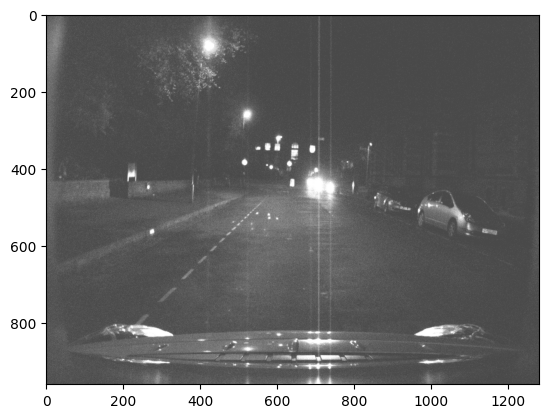

In [107]:
plt.imshow(aug_plt_img, cmap='gray', vmin=0, vmax=255)